# Ex2 - Getting and Knowing your Data

Check out [Chipotle Exercises Video Tutorial](https://www.youtube.com/watch?v=lpuYZ5EUyS8&list=PLgJhDSE2ZLxaY_DigHeiIDC1cD09rXgJv&index=2) to watch a data scientist go through the exercises

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chipo = pd.read_csv(url, sep = '\t')

### Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


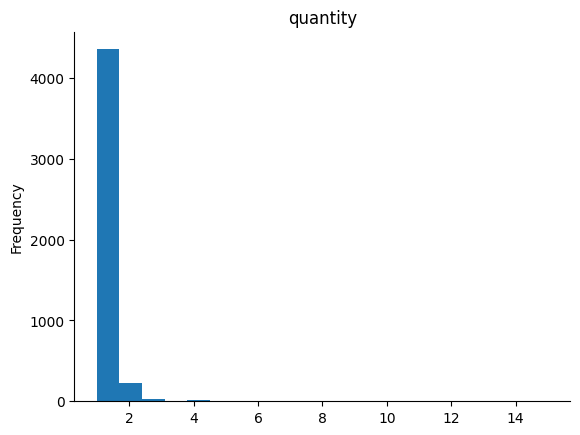

In [4]:
# @title quantity

from matplotlib import pyplot as plt
chipo['quantity'].plot(kind='hist', bins=20, title='quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Step 5. What is the number of observations in the dataset?

In [ ]:
# Solution 1

chipo.shape[0]  # entries <= 4622 observations

4622

In [ ]:
# Solution 2

chipo.info() # entries <= 4622 observations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.6+ KB


### Step 6. What is the number of columns in the dataset?

In [ ]:
chipo.shape[1]

5

### Step 7. Print the name of all the columns.

In [ ]:
chipo.columns

Index([u'order_id', u'quantity', u'item_name', u'choice_description',
       u'item_price'],
      dtype='object')

### Step 8. How is the dataset indexed?

In [ ]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Step 9. Which was the most-ordered item?

In [ ]:
c = chipo.groupby('item_name')
c = c.sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


### Step 10. For the most-ordered item, how many items were ordered?

In [ ]:
c = chipo.groupby('item_name')
c = c.sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


### Step 11. What was the most ordered item in the choice_description column?

In [ ]:
c = chipo.groupby('choice_description').sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(1)
# Diet Coke 159

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


### Step 12. How many items were orderd in total?

In [ ]:
total_items_orders = chipo.quantity.sum()
total_items_orders

4972

### Step 13. Turn the item price into a float

#### Step 13.a. Check the item price type

In [ ]:
chipo.item_price.dtype

dtype('O')

#### Step 13.b. Create a lambda function and change the type of item price

In [ ]:
dollarizer = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(dollarizer)

#### Step 13.c. Check the item price type

In [ ]:
chipo.item_price.dtype

dtype('float64')

### Step 14. How much was the revenue for the period in the dataset?

In [ ]:
revenue = (chipo['quantity']* chipo['item_price']).sum()

print('Revenue was: $' + str(np.round(revenue,2)))

Revenue was: $39237.02


### Step 15. How many orders were made in the period?

In [ ]:
orders = chipo.order_id.value_counts().count()
orders

1834

### Step 16. What is the average revenue amount per order?

In [ ]:
# Solution 1

chipo['revenue'] = chipo['quantity'] * chipo['item_price']
order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped.mean()['revenue']

21.394231188658654

In [ ]:
# Solution 2

chipo.groupby(by=['order_id']).sum().mean()['revenue']

21.394231188658654

### Step 17. How many different items are sold?

In [ ]:
chipo.item_name.value_counts().count()

50